In [3]:
import numpy as np

In [13]:
with open ("train-images.idx3-ubyte",'rb') as f:
    X_train = np.frombuffer(f.read(),np.uint8,offset =16)
    #This is a boilerplate 
with open ("t10k-images.idx3-ubyte",'rb') as f:
    X_test = np.frombuffer(f.read(),np.uint8,offset =16)
    #This is a boilerplate 


This has two issues :
    its in 1d array
    its in bytes 

In [14]:
#reshaping the data array to image of array of 28*28
X_train =X_train.reshape(-1,1,28,28)
X_test =X_test.reshape(-1,1,28,28)
#first param - by making it -1, the number of images will be inferred from the value of other dimensions and the length of the 
#input array
#2nd param - as it is monochrome image, the channel is 1, if it were RGB then it would have been 3/4.
#3rd and 4th are the dimensions of the image.

X_train = X_train/np.float32(256)
X_test = X_test/np.float32(256)

In [15]:
with open ("train-labels.idx1-ubyte",'rb') as f:
    y_train = np.frombuffer(f.read(),np.uint8,offset =8)
    #This is a boilerplate 
with open ("t10k-labels.idx1-ubyte",'rb') as f:
    y_test = np.frombuffer(f.read(),np.uint8,offset =8)
    #This is a boilerplate 

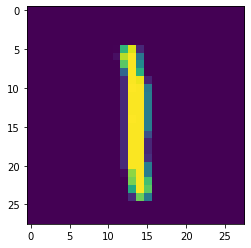

In [24]:
import matplotlib.pyplot as plt
plt.show(plt.imshow(X_train[14][0]))

Training the Neural network now

Using python packages theano and Lasagne, theano is mathematical packages like numpy aslso called tensors(large dimensional arrays).
Lasagne is build on theano support building of NN. Helps you define error func, train NN, etc

In [ ]:
!pip install -r https://raw.githubusercontent.com/Lasagne/Lasagne/master/requirements.txt

In [28]:
import lasagne
import theano
import theano.tensor as T

def build_NN(input_var=None):
    l_in = lasagne.layers.InputLayer(shape=(None,1,28,28),input_var=input_var)
    
    #we add a 20% of dropout, this means that we randomly 20% of edges that connect input to next layer, will be dropped.
    #to avoid overfitting. Each time we instantiating a different layer, withha dropout
    l_in_drop = lasagne.layers.DropoutLayer(l_in,p=0.2)
    
    l_hid1 = lasagne.layers.DenseLayer(l_in_drop,num_units =800, nonlinearity= lasagne.nonlinearities.rectify,
                                      W=lasagne.init.GlorotUniform())
    #glorot is used ti intialize random weights
    #we will add a dropout of 50% to hidden layer 1
    l_hid1_drop = lasagne.layers.DropoutLayer(l_hid1,p=0.5)
    
    l_hid2=lasagne.layers.DenseLayer(l_hid1_drop,num_units=800,nonlinearity=lasagne.nonlinearities.rectify,
                                    W=lasagne.init.GlorotUniform())
    
    l_hid2_drop = lasagne.layers.DropoutLayer(l_hid2,p=0.5)
    
    l_out = lasagne.layers.DenseLayer(l_hid2_drop,num_units =10, nonlinearity = lasagne.nonlinearities.softmax)
    
    return l_out

# Now we tell the network how to train itself, it has to sett some weights.
# set up some function to tell nn how to train itself

input_var = T.tensor4('inputs')
target_var = T.ivector('targets')

network=build_NN(input_var)

# training steps:
#  1. compute an error function
prediction = lasagne.layers.get_output(network)
loss = lasagne.objectives.categorical_crossentropy(prediction,target_var)

loss= loss.mean()

#b. we tell how to update all its weights based on the value of error funtion,this is based on stochastic gradient descent
params = lasagne.layers.get_all_params(network, trainable = True)
updates = lasagne.updates.nesterov_momentum(loss,params, learning_rate=0.01, momentum=0.9)

#
train_fn = theano.function([input_var,target_var],loss, updates=updates)

In [ ]:
num_training_steps = 10

for step in range(num_training_steps):
    train_err = train_fn(X_train,y_train)
    print("current step is "+str(step))

In [ ]:
# check with the testing set, starting with 1 image
test_prediction = lasagne.layers.get_output(network)
val_fn = theano.function([input_var],test_prediction)

val_fn([X_test[0]])

In [ ]:
y_test[0]

In [ ]:
#now all together
test_prediction = lasagne.layers.get_output(network)
